#Perceptron

##Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Data set: Tabla de verdad compuerta OR

In [2]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
outputs = np.array([0,1,1,1])

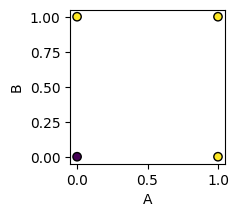

In [3]:
plt.figure(figsize=(2,2))
plt.scatter(inputs[:,0],inputs[:,1],marker="o",c=outputs,edgecolors="k")
plt.xlabel('A')
plt.ylabel('B')
plt.show()

##Parámetros


*   Pesos (w vector)
*   Bias (b)
*   Razón de aprendizaje



In [4]:
w = np.random.rand(2)
b = np.random.rand(1)
lr = 0.1
w,b, lr

(array([0.57054012, 0.53537633]), array([0.1237285]), 0.1)

##Modelo

In [5]:
#Definir función de predicción
def predict(x):
  linear_sum = np.dot(x,w)+b
  return np.where(linear_sum >= 0, 1, 0)
  #return np.heaviside(linear_sum,0)

In [6]:
predict(inputs)

array([1, 1, 1, 1])

In [7]:
def train(inputs, outputs, lr, epocas):
  global w,b
  for epoca in epocas:
    total_error = 0
    for x,y in zip(inputs,outputs):
      y_pred = predict(x)
      error = y - y_pred
      total_error += abs(error)
      w += lr*error*x
      b += lr*error
    print(f"Epoca: {epoca}, Error: {total_error}, Pesos: {w}, Bias: {b}")

In [8]:
def error(inputs, outputs,last_epoc):
  total_error = 0
  for x,y in zip(inputs,outputs):
    y_pred = predict(x)
    error = y - y_pred
    total_error += abs(error)
  print(f"Para la última epoca({last_epoc}), Error: {total_error}")

In [9]:
train(inputs, outputs, lr, range(3))
error(inputs, outputs,4)

Epoca: 0, Error: [1], Pesos: [0.57054012 0.53537633], Bias: [0.0237285]
Epoca: 1, Error: [1], Pesos: [0.57054012 0.53537633], Bias: [-0.0762715]
Epoca: 2, Error: [0], Pesos: [0.57054012 0.53537633], Bias: [-0.0762715]
Para la última epoca(4), Error: [0]


##Gráfica de límite de decisión

In [10]:
A_Ld=np.array([-0.5, 0, 0.5, 1, 1.5])
B_Ld=((-w[0]*A_Ld)-b)/w[1]
A_Ld,B_Ld

(array([-0.5,  0. ,  0.5,  1. ,  1.5]),
 array([ 0.67530359,  0.14246333, -0.39037692, -0.92321718, -1.45605744]))

Text(0, 0.5, 'B')

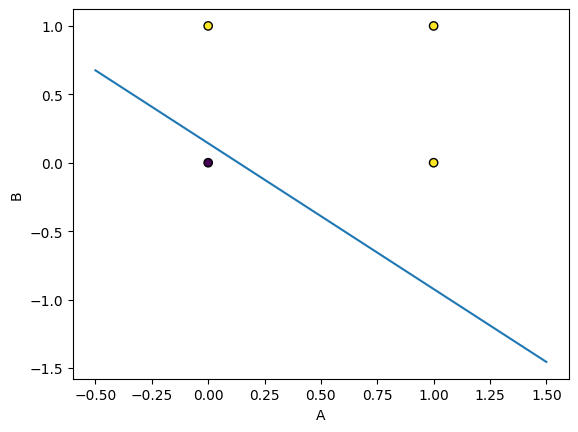

In [11]:
plt.plot(A_Ld,B_Ld)
plt.scatter(inputs[:,0],inputs[:,1],marker="o",c=outputs,edgecolors="k")
plt.xlabel('A')
plt.ylabel('B')